In [1]:
%matplotlib inline                                                             
import matplotlib as mpl                                                          #packages imported
import matplotlib.pyplot as plt
import random

In [2]:
def spheref(x,y):                                                                 #sphere function
    sum = float(x**2+y**2)
    return sum

In [3]:
def roulette_wheel(c,total):                                                      #roulette wheel function
    leader=-1
    r = random.uniform(0,1)
    for n in range(c):
        if r<total[n]:
            leader=n
            break
    return leader 

In [4]:
def probability_func(c,values,prob):                                              #calculating probability
    values2=[]
    for i in range(c):
        values2.append(float(1/values[i]))

    for j in range(c):
        prob.append(values2[j]/sum(values2))
    return prob

In [5]:
def new_range(r,c,matrix):                                                        #calculating new range
    global l,u,frange
    #print("lower bound=",l,"upper bound=",u)
    rg=r*(u-l)/2
    u=rg
    l=(-rg)
  
    for i in range(c):
        for j in range(2):       
            ulb=matrix[i][j]-rg
            uub=matrix[i][j]+rg
            frange[i][j][0]=max(ulb,l)
            frange[i][j][1]=min(uub,u)       
    return(l,u,frange)     

In [6]:
def new_inputf(c,new_input):                                                      #new matrix acc to following                                                              
    global frange
    for i in range(c):
        ninput = []
        for j in range(2):
            ninput.append(random.uniform(frange[i][j][0],frange[i][j][1]))
        new_input.append(ninput)
    return new_input    

In [7]:
def main_func(r,c,matrix,x,xaxis,yaxis,yrange):   
    global frange,l,u               
   
    values=[]                                                                     #applying sphere function
    for i in range(c):
        values.append(float(spheref(matrix[i][0],matrix[i][1])))
    print("Function evaluation: ",values)
    
    xaxis.append(x)
    for p in range(c):
        yaxis[p].append(values[p])  
    for i in range(c):
        for j in range(2):
            for k in range(2):
                yrange[i][j][k].append(frange[i][j][k]) 
                
    prob=[]
    probability_func(c,values,prob)
    #print("Probabilities: ",prob)
    
    total=[]                                                                      #creating the roulette scale
    for i in range(c):
        total.append(sum(prob[0:i+1]))
    #print("Roulette Wheel: ",total)
    
    c_follow=[]                                                                   #determining who follows whom
    for i in range(c):
        c_follow.append(int(roulette_wheel(c,total)))
    #print("Following: ",c_follow)
    
    new_matrix=[]                                                                 #new matrix acc to following
    for i in range(0,c):
        ninmatrix = []
        for j in range(2):
            ninmatrix.append(matrix[c_follow[i]][j])
        new_matrix.append(ninmatrix)
    
    matrix=new_matrix
    #print("Matrix according to following: ",matrix)
    
    new_range(r,c,matrix)
    #print("New range matrix: ",frange)
    
    new_input=[]                                                                  #new matrix acc to following
    new_inputf(c,new_input)
    #print("Next Learning attempt: ",new_input)
    
    print("Learning attempt no= ",x)
    x=x+1
    if x>31:
        return(xaxis,yaxis)
    else:
        main_func(r,c,new_input,x,xaxis,yaxis,yrange)    

In [8]:
r=float(input("Enter reduction factor"))
c=int(input("Enter number of candidates:"))
l=float(input("Enter lower bound:"))
u=float(input("Enter upper bound:"))
frange=[]
for i in range(c):
    frange.append([[l,u],[l,u]])
print(frange) 

matrix=[]                                                                        #list to store values of variables
for i in range(0,c):
    inmatrix = []
    for j in range(2):
        inmatrix.append(random.uniform(frange[i][j][0],frange[i][j][1]))
    matrix.append(inmatrix)
#print("Learning attempt 1: ",matrix)

Enter reduction factor0.9
Enter number of candidates:3
Enter lower bound:-5.12
Enter upper bound:5.12
[[[-5.12, 5.12], [-5.12, 5.12]], [[-5.12, 5.12], [-5.12, 5.12]], [[-5.12, 5.12], [-5.12, 5.12]]]


In [9]:
xa=[]                                                                            #x axis = learning attempts
ya=[[] for _ in range(c)]                                                        #y axis = values
yb=[[[[] for _ in range(2)] for _ in range(2)] for _ in range(c)]                #y axis = min & max bounds

main_func(r,c,matrix,1,xa,ya,yb)

Function evaluation:  [3.886721643878163, 15.994089281402697, 13.455486445254254]
Learning attempt no=  1
Function evaluation:  [4.231307946903726, 3.4590840016079176, 3.488944900941106]
Learning attempt no=  2
Function evaluation:  [7.868944390000195, 15.767156883562112, 0.6065648045126644]
Learning attempt no=  3
Function evaluation:  [4.7557169129762835, 15.988260911578239, 5.401978815860303]
Learning attempt no=  4
Function evaluation:  [14.847560501820512, 4.860646547664154, 0.3084118820858321]
Learning attempt no=  5
Function evaluation:  [5.821053339032465, 7.983874141987882, 6.273124744320559]
Learning attempt no=  6
Function evaluation:  [1.8456836173494302, 4.622088181853839, 2.270708088945719]
Learning attempt no=  7
Function evaluation:  [2.246491390004195, 2.1515025366640805, 2.3072330986429472]
Learning attempt no=  8
Function evaluation:  [2.825350742172462, 3.982675080331665, 0.8707184800535446]
Learning attempt no=  9
Function evaluation:  [0.15705880407140788, 3.10682

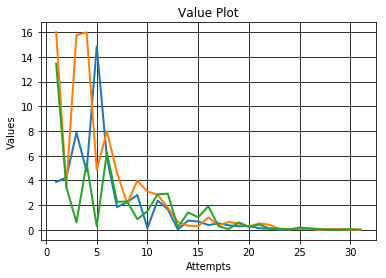

In [10]:
for p in range(c):
    plt.plot(xa,ya[p],linewidth=2)
    
plt.title("Value Plot")
plt.xlabel("Attempts")
plt.ylabel("Values")
plt.grid(True,color='k')
plt.show()

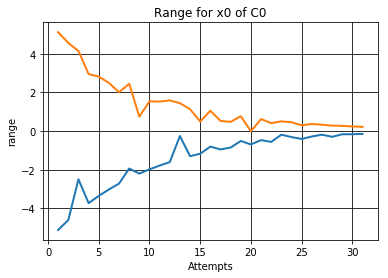

In [11]:
for p in range(2):
    plt.plot(xa,yb[0][0][p],linewidth=2)
    
plt.title("Range for x0 of C0")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

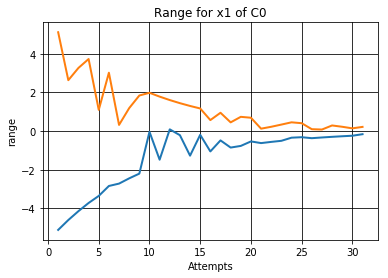

In [12]:
for p in range(2):
    plt.plot(xa,yb[0][1][p],linewidth=2)
    
plt.title("Range for x1 of C0")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

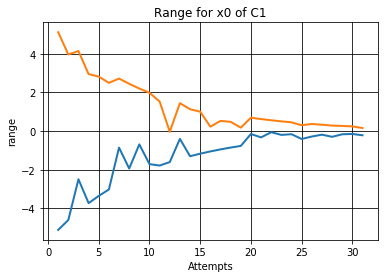

In [13]:
for p in range(2):
    plt.plot(xa,yb[1][0][p],linewidth=2)
    
plt.title("Range for x0 of C1")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

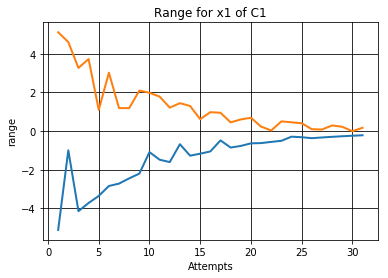

In [14]:
for p in range(2):
    plt.plot(xa,yb[1][1][p],linewidth=2)
    
plt.title("Range for x1 of C1")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

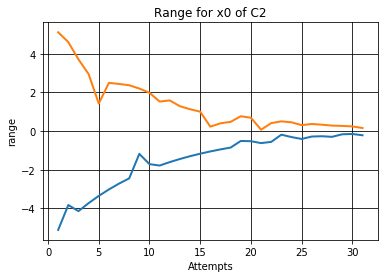

In [15]:
for p in range(2):
    plt.plot(xa,yb[2][0][p],linewidth=2)
    
plt.title("Range for x0 of C2")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

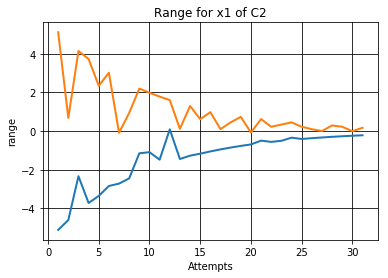

In [16]:
for p in range(2):
    plt.plot(xa,yb[2][1][p],linewidth=2)
    
plt.title("Range for x1 of C2")
plt.xlabel("Attempts")
plt.ylabel("range")
plt.grid(True,color='k')
plt.show()

###### 